In [2]:
from walker import Walker

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
font = {'weight' : 'light',
        'size'   : 20}
plt.rc('font', **font)

In [34]:
mu = np.array([[0.0, 0.0], [100, 0.0]])
sigma =  np.array([[0.3, 0.1], [0.1, 0.1]])
theta = np.array([[np.pi/4], [0]])
bins = 500

w = Walker(mu=mu, sigma=sigma**2, theta=theta, bins=bins)

In [35]:
axis = np.linspace(-1, 1, bins)
V = np.zeros((bins,bins))
for i in range(bins):
    for j in range(bins):
        V[j,i] = w.potential([axis[i],axis[j]])

In [36]:
def R(x, theta=np.pi):
    Rot_Op = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return np.dot(Rot_Op, x)

In [37]:
x = np.array([sigma[0][0], mu[0][0]])
xrot = R(x, theta=np.pi/2)

y = np.array([sigma[0][1], mu[0][1]])
yrot = R(y, theta=-np.pi/2)

/home/promano/Programs/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


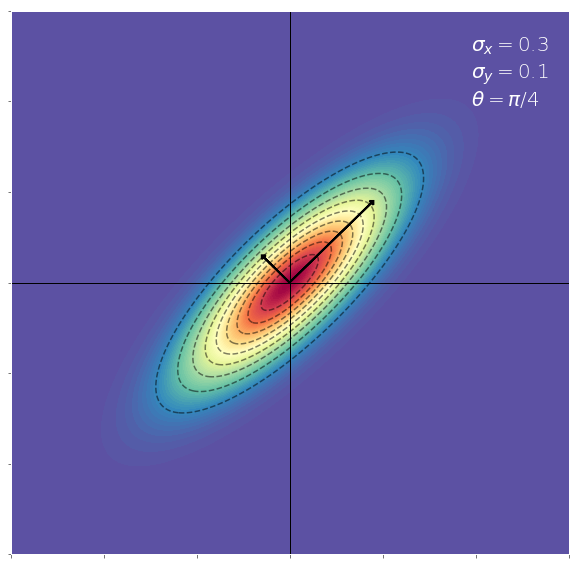

In [38]:
save = False
plt.figure(figsize=(10,10))

# plot potential surface
plt.contourf(V, 100, extent=[-1,1,-1,1], cmap=plt.cm.Spectral)
plt.contour(V, 10, colors='k', extent=[-1,1,-1,1], alpha=0.5)

# draw x-axis in normal and rotated frames
plt.plot([-1,1], np.zeros(2), linewidth=1, color='k')
plt.arrow(mu[0][0], mu[0][1], x[0]+xrot[0], xrot[1], 
          head_length=0.01, head_width=0.02, 
          length_includes_head=True,
          linewidth=2, color='k')

# draw y-axis in normal and rotated frames
plt.plot(np.zeros(2), [-1,1], linewidth=1, color='k')
plt.arrow(mu[0][0], mu[0][1], yrot[1], y[0]+yrot[0], 
          head_length=0.01, head_width=0.02, 
          length_includes_head=True,
          linewidth=2, color='k')

# parameters values legend
plt.text(0.65, 0.85, r'$\sigma_x=0.3$', color='w', fontsize=20)
plt.text(0.65, 0.75, r'$\sigma_y=0.1$', color='w', fontsize=20)
plt.text(0.65, 0.65, r'$\theta=\pi/4$', color='w', fontsize=20)

# set x-axis
xticks = np.linspace(-1, 1, 7)
xtick_labels = ['' for i in xticks]
plt.xticks(xticks, xtick_labels)
plt.xlim([-1,1])

# set y-axis
yticks = np.linspace(-1, 1, 7)
ytick_labels = ['' for i in yticks]
plt.yticks(yticks, ytick_labels)
plt.ylim([-1,1])

if save is True:
    plt.savefig('diffusion_potential_parameters.svg', format='svg')
plt.show()